In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import os

# Set TensorFlow to use CPU only
os.environ['CUDA_VISIBLE_DEVICES'] = ''

2024-04-14 17:45:58.529284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 17:45:59.733137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the dataset
df = pd.read_csv('sentiment_3000.csv')

# Define the function to map sentiment to numerical values
def map_sentiment(sentiment):
    if sentiment == 'positif':
        return 1
    elif sentiment == 'netral':
        return 0
    else:
        return -1

# Map sentiment to numerical values
df['sentimen'] = df['sentimen'].map(map_sentiment)

# Split the data into features and labels
X = df['content']
y = df['sentimen']

In [3]:
# Perform TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/2


2024-04-14 17:46:02.097844: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.8788 - loss: 0.2980
Epoch 2/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 1.0000 - loss: 5.2497e-06
Accuracy: 100.0 %


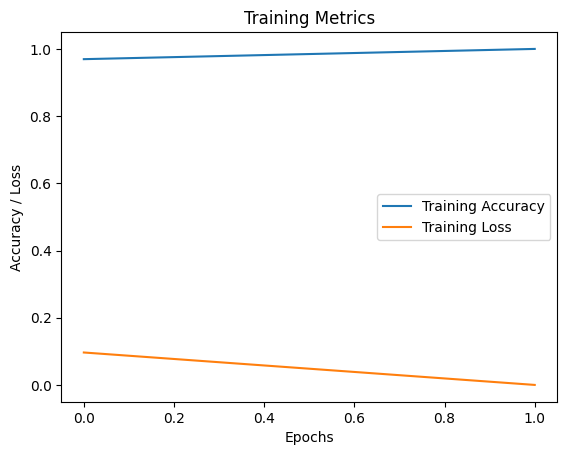

In [4]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=X.shape[1], output_dim=128))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

try:
    # Train the model
    history = model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=1)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, epochs=1, batch_size=64,verbose=0)

    print("Accuracy:", accuracy * 100, "%")

    # Plot training metrics
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.title('Training Metrics')
    plt.legend()
    plt.show()

except Exception as e:
    print("An error occurred during training:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Berita: Perusahaan teknologi terkemuka meluncurkan produk baru yang revolusioner.
Sentimen Prediksi: -1

Berita: Perekonomian mengalami peningkatan signifikan pada kuartal terakhir.
Sentimen Prediksi: -1

Berita: Stok bahan baku menurun, memicu kekhawatiran akan kelangsungan produksi.
Sentimen Prediksi: -1



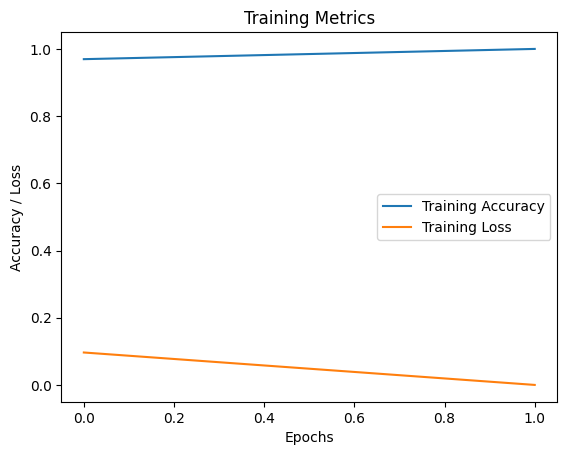

In [5]:
import matplotlib.pyplot as plt

# Contoh berita untuk diprediksi
news_example = [
    "Perusahaan teknologi terkemuka meluncurkan produk baru yang revolusioner.",
    "Perekonomian mengalami peningkatan signifikan pada kuartal terakhir.",
    "Stok bahan baku menurun, memicu kekhawatiran akan kelangsungan produksi."
]

# Preprocess contoh berita
news_example_tfidf = tfidf_vectorizer.transform(news_example).toarray()

# Prediksi sentimen dari contoh berita
predictions = model.predict(news_example_tfidf)
sentiments = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Tampilkan hasil prediksi
for news, sentiment in zip(news_example, sentiments):
    print("Berita:", news)
    print("Sentimen Prediksi:", sentiment)
    print()

# Plot training metrics
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Training Metrics')
plt.legend()
plt.show()
